<a href="https://colab.research.google.com/github/mn000000/Simulacion-2/blob/main/ejercicio_2_simulacion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 2: Método Monte Carlo de Acierto y Error


En esta notebook, resolveremos los ejercicios del Método Monte Carlo de Acierto y Error. Implementaremos las funciones necesarias y realizaremos simulaciones para:
1. Estimar integrales.
2. Estimar el valor de π.
3. Estimar integrales específicas.
4. Calcular la probabilidad de raíces reales de una ecuación cuadrática.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


## Estimación de la Integral usando el Método Monte Carlo de Acierto y Error

Estimación de la integral: 1.7092556137350474


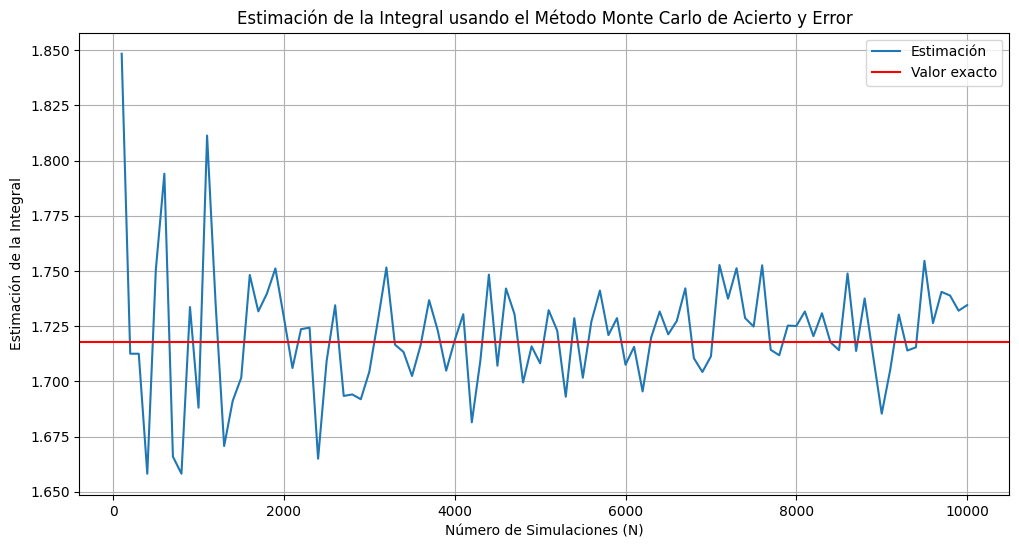

In [2]:

def estimar_integral_montecarlo(g, a, b, c, N):
    U = np.random.uniform(0, 1, N)
    U_prime = np.random.uniform(0, 1, N)
    X = a + U * (b - a)
    NH = np.sum(g(X) >= c * U_prime)
    theta1 = c * (b - a) * NH / N
    return theta1

# Ejemplo de uso
def g(x):
    return np.exp(x)

a = 0
b = 1
c = np.exp(1)
N = 10000

estimacion = estimar_integral_montecarlo(g, a, b, c, N)
print(f"Estimación de la integral: {estimacion}")

# Gráfica del estimador versus N
Ns = np.arange(100, 10001, 100)
estimaciones = [estimar_integral_montecarlo(g, a, b, c, n) for n in Ns]

plt.figure(figsize=(12, 6))
plt.plot(Ns, estimaciones, label='Estimación')
plt.axhline(y=1.718, color='r', linestyle='-', label='Valor exacto')
plt.xlabel('Número de Simulaciones (N)')
plt.ylabel('Estimación de la Integral')
plt.title('Estimación de la Integral usando el Método Monte Carlo de Acierto y Error')
plt.legend()
plt.grid()
plt.show()


## Estimación del número π usando el Método Monte Carlo de Acierto y Error

Estimación de π: 3.1236


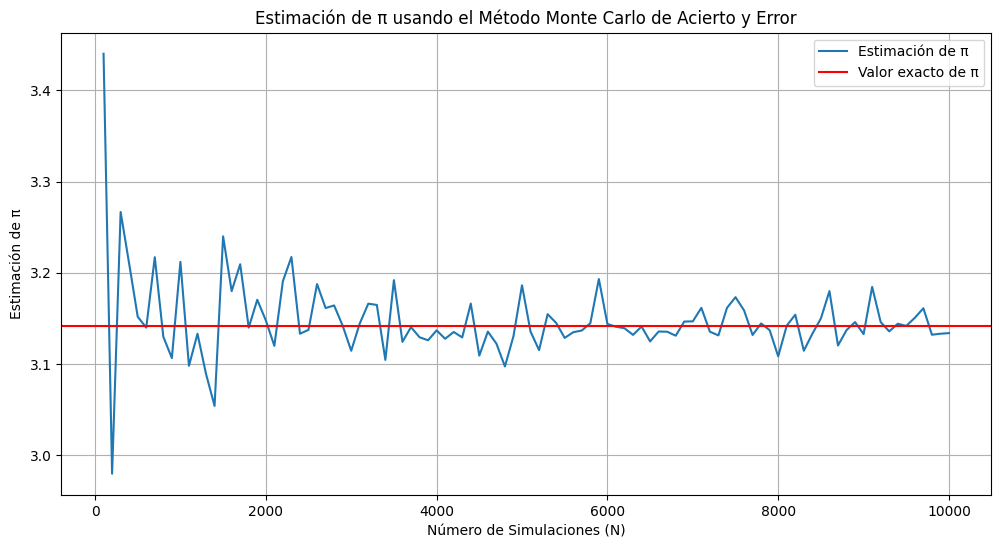

In [3]:

def estimar_pi_montecarlo(N):
    U = np.random.uniform(0, 1, N)
    U_prime = np.random.uniform(0, 1, N)
    NH = np.sum(U**2 + U_prime**2 <= 1)
    pi_estimado = 4 * NH / N
    return pi_estimado

# Ejemplo de uso
N = 10000
pi_estimado = estimar_pi_montecarlo(N)
print(f"Estimación de π: {pi_estimado}")

# Gráfica del estimador de π versus N
Ns = np.arange(100, 10001, 100)
estimaciones_pi = [estimar_pi_montecarlo(n) for n in Ns]

plt.figure(figsize=(12, 6))
plt.plot(Ns, estimaciones_pi, label='Estimación de π')
plt.axhline(y=np.pi, color='r', linestyle='-', label='Valor exacto de π')
plt.xlabel('Número de Simulaciones (N)')
plt.ylabel('Estimación de π')
plt.title('Estimación de π usando el Método Monte Carlo de Acierto y Error')
plt.legend()
plt.grid()
plt.show()


## Estimación de Integrales Específicas usando el Método Monte Carlo de Acierto y Error

In [4]:

# Integral (a) ∫_0^1 exp(e^x) dx
def g_a(x):
    return np.exp(np.exp(x))

a = 0
b = 1
c = np.exp(np.exp(1))

estimacion_a = estimar_integral_montecarlo(g_a, a, b, c, N)
print(f"Estimación de la integral (a): {estimacion_a}")

# Integral (b) ∫_0^1 (1 - x^2)^(3/2) dx
def g_b(x):
    return (1 - x**2)**(3/2)

c = 1

estimacion_b = estimar_integral_montecarlo(g_b, a, b, c, N)
print(f"Estimación de la integral (b): {estimacion_b}")


Estimación de la integral (a): 6.434499747732095
Estimación de la integral (b): 0.5941


## Estimación de la Probabilidad de Raíces Reales de una Ecuación Cuadrática

In [8]:

def estimar_probabilidad_raices_reales(N):
    p = np.random.uniform(0, 2, N)
    q = np.random.uniform(0, 2, N)
    discriminante = p**2 - 4*q
    probabilidad = np.sum(discriminante >= 0) / N
    return probabilidad

# Ejemplo de uso
N = 10000
probabilidad = estimar_probabilidad_raices_reales(N)
print(f"Probabilidad de que las raíces sean reales: {probabilidad}")

# Comparación teórica
probabilidad_teorica = 1/2
print(f"Probabilidad teórica: {probabilidad_teorica}")


Probabilidad de que las raíces sean reales: 0.1678
Probabilidad teórica: 0.5
